<a href="https://colab.research.google.com/github/bassim1/COP28hack4climate/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install rasterio==1.3.5 --quiet gdal==3.4.3 pystac pystac_client planetary_computer tenacity rich pandas==1.5.3 torch torchvision transformers huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 26.0 MB/s eta 0:00:00


In [2]:
%pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-n9gllyru
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-n9gllyru
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 134a48a81ebd691686187ecce2d016fb327a8852
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-5hbu4ye_/groundingdino_f9888a69ea914d13a1675f7cc7d16deb
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-5hbu4ye_/groundingdino_f9888a69ea914d13a1675f7cc7d16deb
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 16e6b4bfcf6ed3a6f0ef2bc5752d716657a6b9fe
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [3]:
from PIL import Image
from lang_sam import LangSAM

/usr/local/lib/python3.10/dist-packages/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [4]:
import rasterio as rio
import os

In [ ]:
image_name = '2022-10-17-00_00_2022-10-17-23_59_CUSTOM_True_Color.tiff'
image_folder = '/content/17-oct-22/'
raster = rio.open(os.path.join(image_folder, image_name), GTIFF_SRS_SOURCE='GEOKEYS')

In [10]:
raster = rio.open('/content/after_QGIS.tif')

In [11]:
band_data = raster.read()
band_data.shape

(3, 2513, 1864)

In [ ]:
# sample_chip = band_data[:,:512,:512]

In [12]:
band_data.max()

2.1953332

In [13]:
# band_data = band_data.clip(0,1)

In [14]:
# sample_chip

In [15]:
import torchvision
import torch
if band_data.max() > 1000:
  band_data = band_data/65535
tensor = torch.tensor(band_data)
image_pil = torchvision.transforms.functional.to_pil_image(tensor)
# chip_pil = torchvision.transforms.functional.to_pil_image(tensor[:,:512,:512])

In [16]:
# tensor_chip = tensor[:,:512,:512].contiguous()
# tensor_chip.size()

In [17]:
# image_name = "/content/Sample_folder/2022-11-16-00_00_2022-11-16-23_59_CUSTOM_True_Color.jpg"
# image_pil = Image.open(image_name)

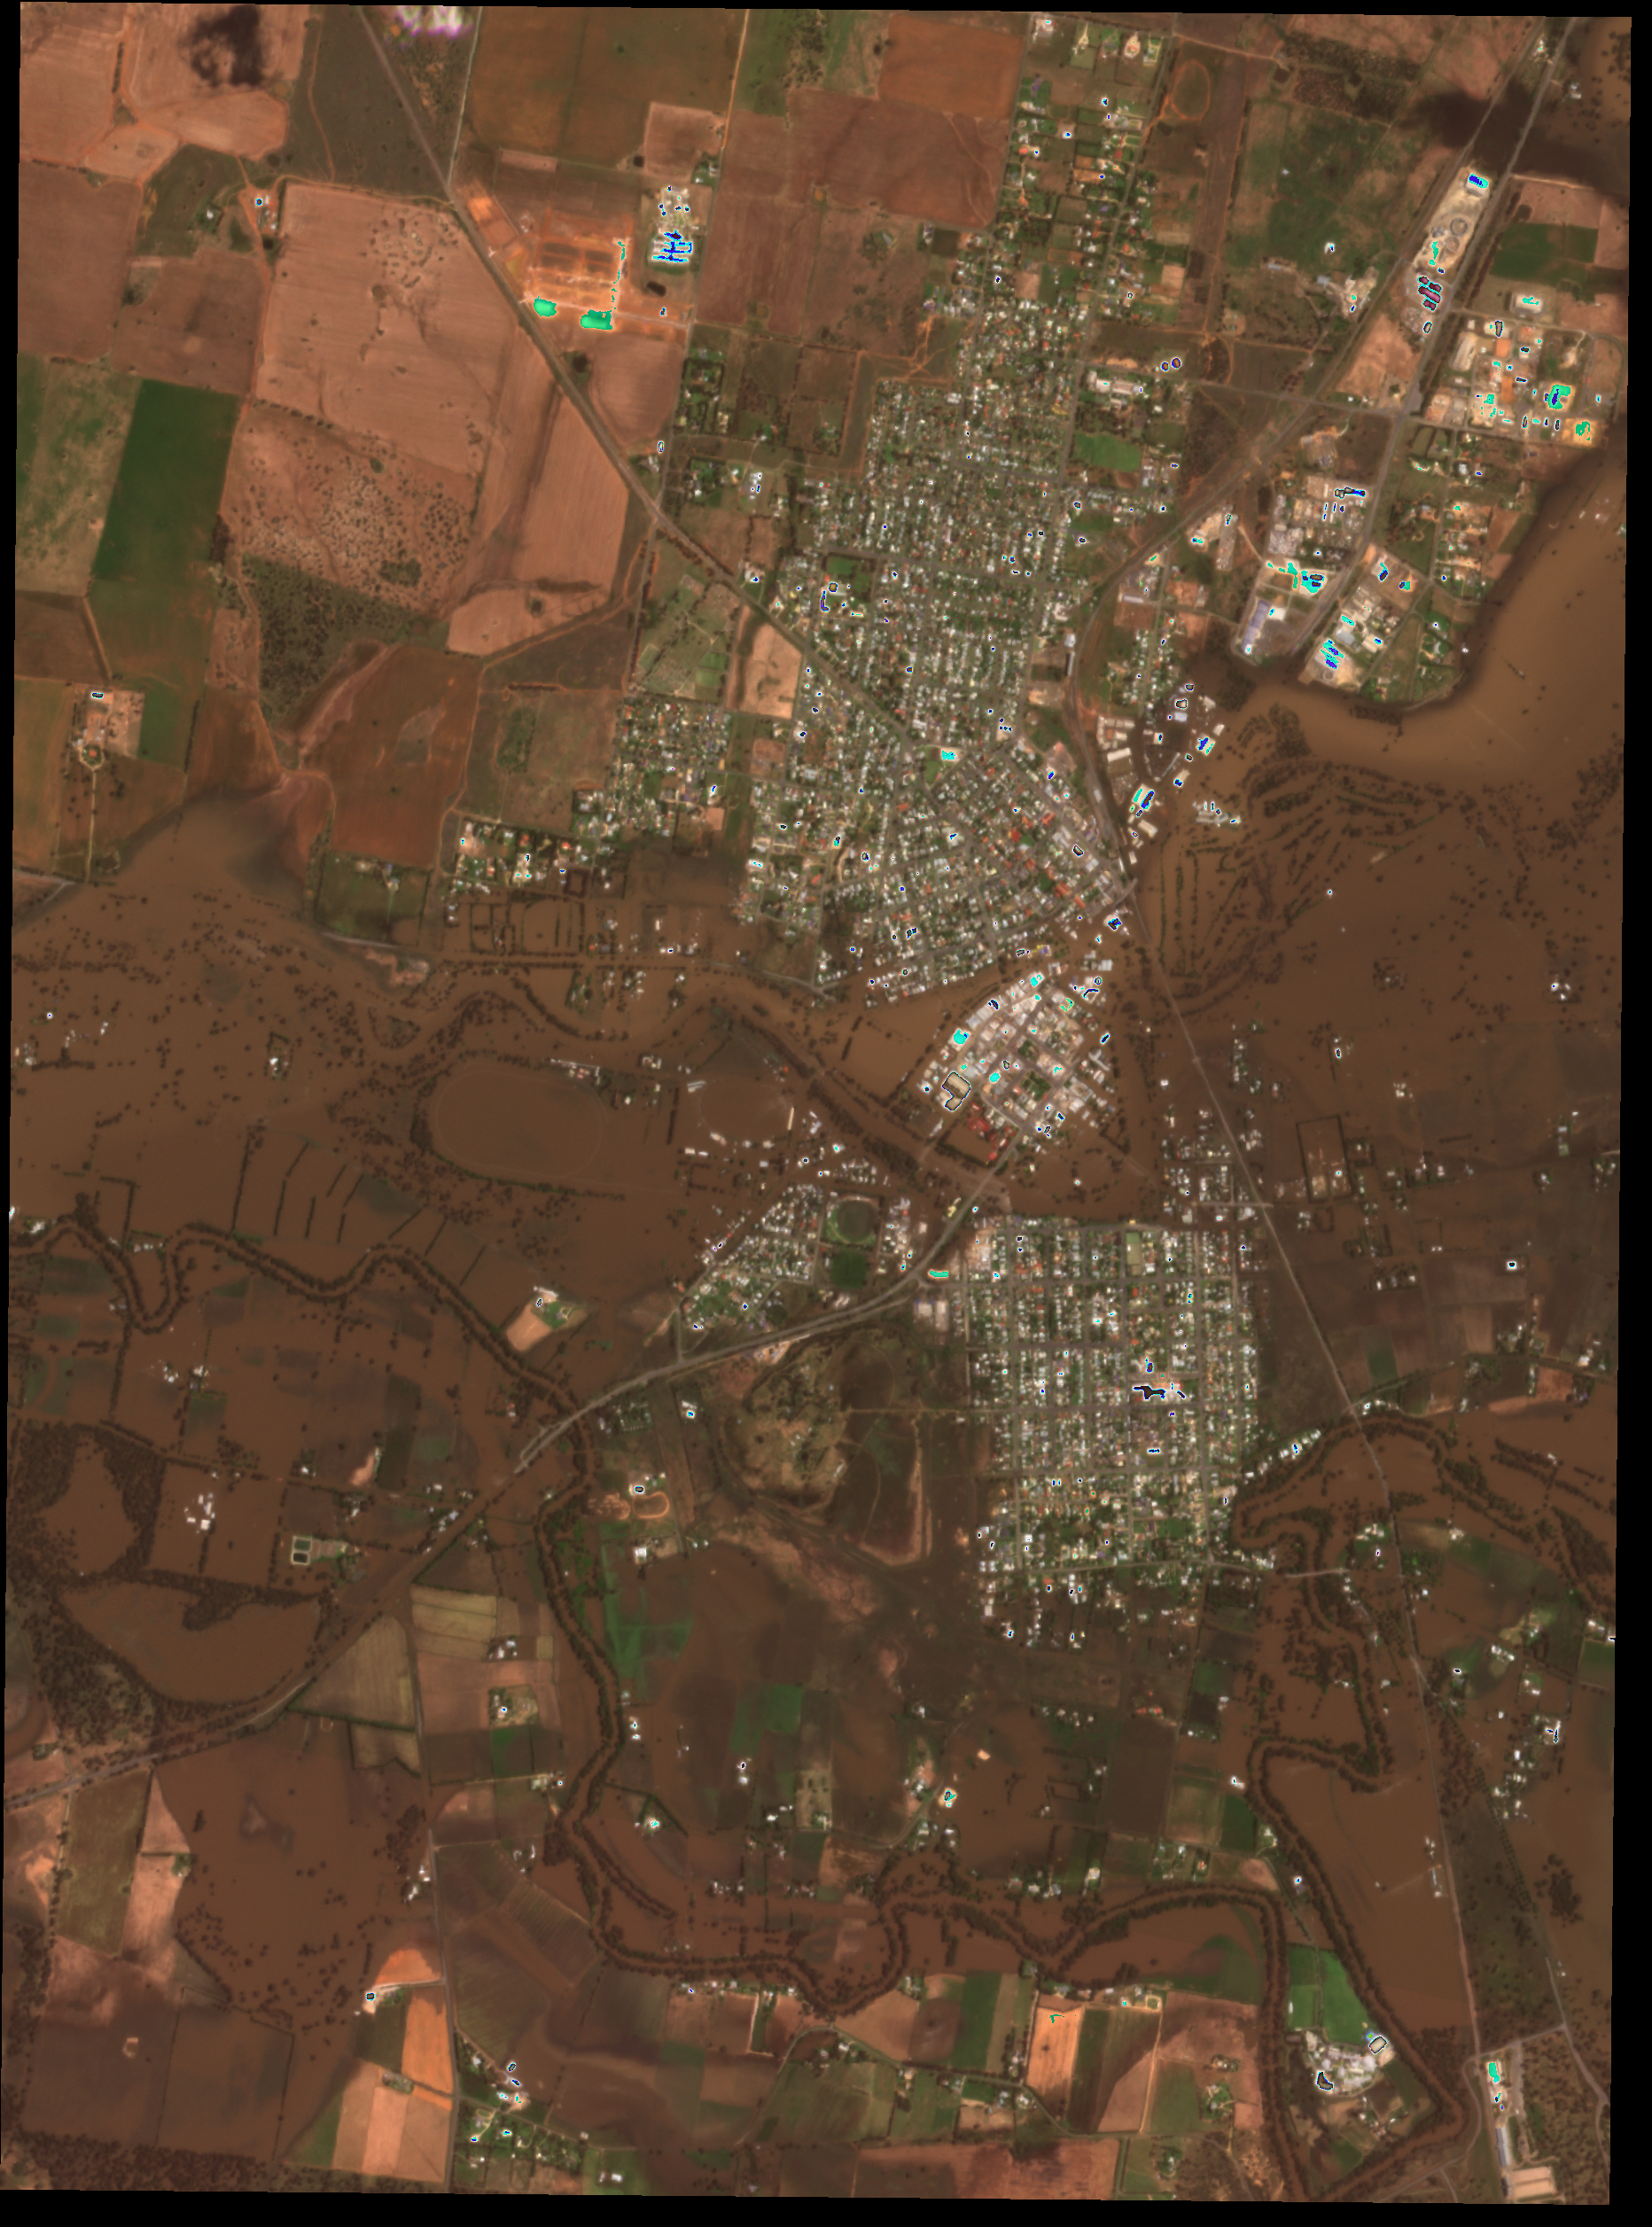

In [18]:
image_pil

In [19]:
model = LangSAM()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:16<00:00, 154MB/s]


In [20]:
text_prompt = "water"

In [21]:
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt, box_threshold = 0.3, text_threshold = 0.3)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [22]:
import numpy as np
from lang_sam.utils import draw_image

In [23]:
as_array = np.array(image_pil)
image = draw_image(as_array, masks, boxes, phrases)

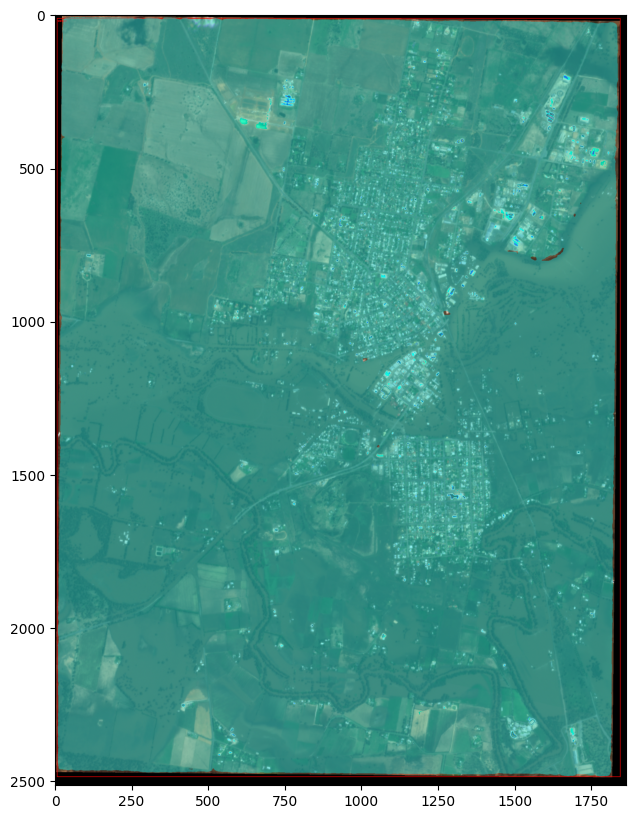

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [ ]:
masks.shape

torch.Size([1, 2500, 1834])

In [ ]:
boxes.shape

torch.Size([1, 4])

In [ ]:
phrases

['river']

In [ ]:
logits

tensor([0.5668])

In [ ]:
from lang_sam.utils import get_contours, contour_to_points
import numpy as np
from shapely.geometry import Polygon
from shapely import affinity, wkt
import geopandas as gpd
import os

In [ ]:
raster.crs

CRS.from_epsg(3857)

In [ ]:
phrases

['buildings', 'buildings']

In [ ]:
polys = []
for mask in masks:
    contours = get_contours(np.array(mask))
    for contour in contours:
        points = contour_to_points(contour)
        polygon = Polygon(points).simplify(2) # 2px simplification
        polygon = affinity.scale(polygon, yfact=-1)

        polys.append(polygon)

# change crs
gdf = gpd.GeoDataFrame(index = phrases, crs = raster.crs, geometry = polys[-len(phrases):])
file_name = f'{os.path.basename(image_name)}.gpkg'
output_filepath = os.path.join(file_name)
gdf.to_file(output_filepath, layer=text_prompt, driver='GPKG')

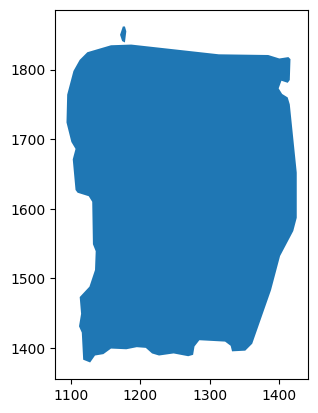

In [ ]:
gdf.plot()
plt.show()

In [ ]:
# difference_gdf = gpd.overlay(gdf1, gdf2, how='difference')

In [58]:
def calculate_red_area(raster_path, red_threshold=0.6, other_threshold=0.3):
  raster = rio.open(raster_path, GTIFF_SRS_SOURCE='GEOKEYS')
  red, green, blue = raster.read()
  red_mask = (red > red_threshold) & (green < other_threshold) & (blue < other_threshold)
  pixel_area = raster.res[0] * raster.res[1]
  total_raster_area = np.sum(red) * pixel_area
  red_area = np.sum(red_mask) * pixel_area

  return red_area, total_raster_area

In [59]:
ndvi_after, _ = calculate_red_area('/content/after/2022-11-17-00_00_2022-11-17-23_59_CUSTOM_NDVI.tiff')
ndwi_after, _ = calculate_red_area('/content/after/2022-11-17-00_00_2022-11-17-23_59_CUSTOM_NDWI.tiff')
ndvi_before, _ = calculate_red_area('/content/before/2022-10-17-00_00_2022-10-17-23_59_CUSTOM_NDVI.tiff')
ndwi_before, total_area = calculate_red_area('/content/before/2022-10-17-00_00_2022-10-17-23_59_CUSTOM_NDWI.tiff')



In [45]:
ndvi_after

14283141.80402093

In [46]:
ndwi_after

0.0

In [48]:
ndvi_before

1557371.9647825886

In [49]:
ndwi_before

0.0

In [57]:
import math
print(f'The water covers {math.floor((ndvi_after - ndvi_before)/ndvi_before)} times more land after the flood than before the flood')

The water covers 8 times more land after the flood than before the flood


In [62]:
print(f'The flooded area is {math.floor((ndvi_after - ndvi_before)/1000000)} square kilometers')

The flooded area is 12 square kilometers


In [64]:
print(f'The total area of interest is {math.floor((total_area)/1000000)} square kilometers')

The total area of interest is 67 square kilometers
